# 0. Data Collection

Import modules and read in data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

In [3]:
bike_df = pd.read_csv('data/chicago_2018.csv')

# change datatype from string to datetime
bike_df['start_time'] = pd.to_datetime(bike_df['start_time'])
bike_df['end_time'] = pd.to_datetime(bike_df['end_time'])

# 1. Data Preparation

## 1.1 Feature Engineering

In [4]:
bike_df['date'] = bike_df['start_time'].dt.date
bike_df['hour'] = bike_df['start_time'].dt.hour
bike_df['weekday'] = bike_df['start_time'].dt.weekday
bike_df['month'] = bike_df['start_time'].dt.month
bike_df['duration'] = bike_df['end_time'] - bike_df['start_time']

## 1.2 Data Integrity

In [5]:
# how many entries are there, where start_time occurs later than end_time?
bike_df[bike_df['start_time'] > bike_df['end_time']].shape[0]

7

In [6]:
# only consider entries where start_time comes before end_time
bike_df = bike_df[bike_df['start_time'] < bike_df['end_time']]

In [7]:
# there are several very short rentals where start and end are identical --> possible erroneous rentals?!
filter1 = bike_df['start_station_id'] == bike_df['end_station_id']
filter2 = bike_df['duration'] < timedelta(seconds=120)

In [8]:
# number of those rentals
bike_df[np.logical_and(filter1, filter2)].shape[0]

7790

In [9]:
# remove those rows
# bike_df = bike_df[np.logical_not(np.logical_and(filter1, filter2))]

# 2. Descriptive Analysis

## 2.1 Temporal Demand and Seasonality

In [10]:
# hourly demand
bike_hourly_demand = bike_df.groupby(['date', 'hour'])['bike_id'].nunique()
bike_hourly_demand = pd.DataFrame(bike_hourly_demand)

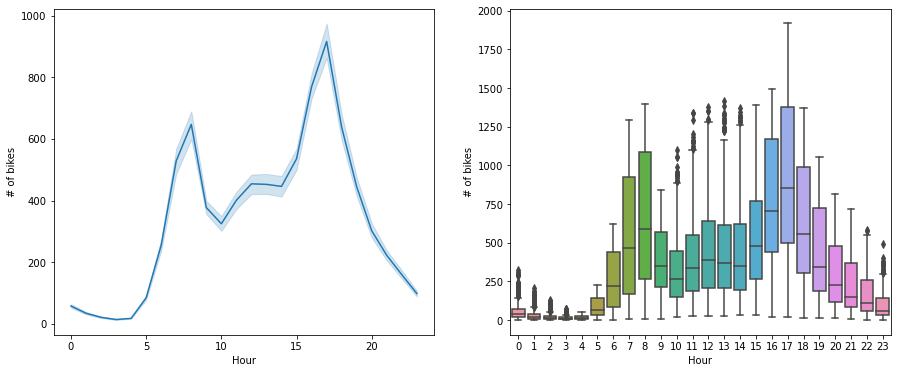

In [11]:
fig, ax = plt.subplots(1,2, figsize=(15,6))

sns.lineplot(x=bike_hourly_demand.index.get_level_values(1), y=bike_hourly_demand['bike_id'],ax=ax[0])

sns.boxplot(x=bike_hourly_demand.index.get_level_values(1), y=bike_hourly_demand['bike_id'],ax=ax[1])

ax[0].set(xlabel='Hour', ylabel='# of bikes')
ax[1].set(xlabel='Hour', ylabel='# of bikes')
plt.show()

Der tägliche Demand peakt morgens um 8 Uhr und nachmittags um 17 Uhr. Der zweite Peak ist höher als der erste.

Dies kann man mit folgender Data erklären.

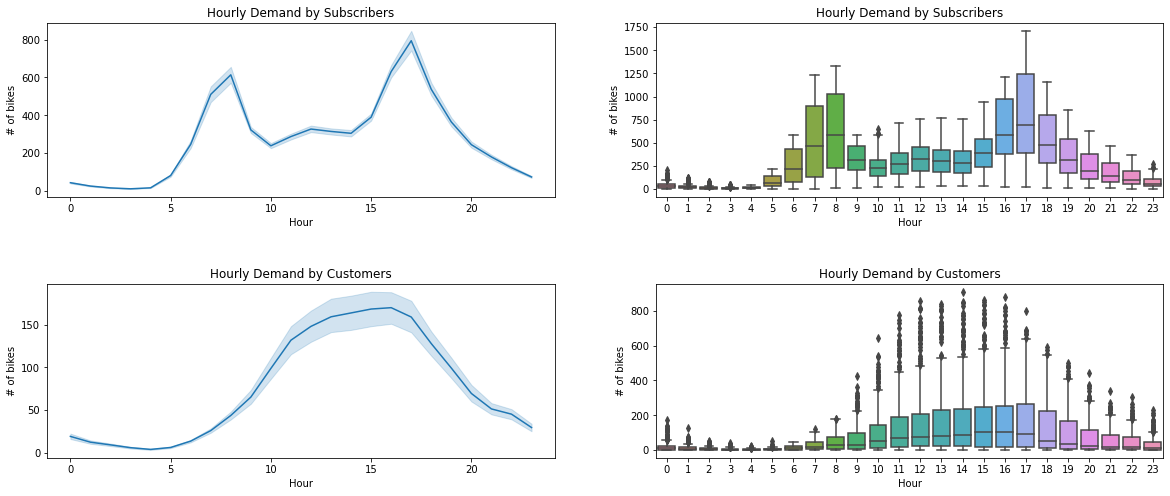

In [22]:
# hourly demand by usertype
bike_hourly_demand_subscriber = bike_df[bike_df['user_type'] == 'Subscriber'].groupby(['date', 'hour'])['bike_id'].nunique()
bike_hourly_demand_subscriber = pd.DataFrame(bike_hourly_demand_subscriber)

bike_hourly_demand_customer = bike_df[bike_df['user_type'] == 'Customer'].groupby(['date', 'hour'])['bike_id'].nunique()
bike_hourly_demand_customer = pd.DataFrame(bike_hourly_demand_customer)


fig, ax = plt.subplots(2,2, figsize=(20,8))

sns.lineplot(x=bike_hourly_demand_subscriber.index.get_level_values(1), y=bike_hourly_demand_subscriber['bike_id'],ax=ax[0,0])

sns.boxplot(x=bike_hourly_demand_subscriber.index.get_level_values(1), y=bike_hourly_demand_subscriber['bike_id'],ax=ax[0,1])

sns.lineplot(x=bike_hourly_demand_customer.index.get_level_values(1), y=bike_hourly_demand_customer['bike_id'],ax=ax[1,0])

sns.boxplot(x=bike_hourly_demand_customer.index.get_level_values(1), y=bike_hourly_demand_customer['bike_id'],ax=ax[1,1])

ax[0,0].set(xlabel='Hour', ylabel='# of bikes')
ax[0,1].set(xlabel='Hour', ylabel='# of bikes')
ax[1,0].set(xlabel='Hour', ylabel='# of bikes')
ax[1,1].set(xlabel='Hour', ylabel='# of bikes')

fig.subplots_adjust(hspace=.5)

ax[0,0].set_title('Hourly Demand by Subscribers')
ax[0,1].set_title('Hourly Demand by Subscribers')
ax[1,0].set_title('Hourly Demand by Customers')
ax[1,1].set_title('Hourly Demand by Customers')

plt.show()

- nachmittags mehr customer unterwegs
- nachmittags mehr subscriber unterwegs -> Freizeitgestaltung der Subscriber

In [13]:
# daily demand
bike_daily_demand = bike_df.groupby(['date', 'weekday'])['bike_id'].nunique()
bike_daily_demand = pd.DataFrame(bike_daily_demand)

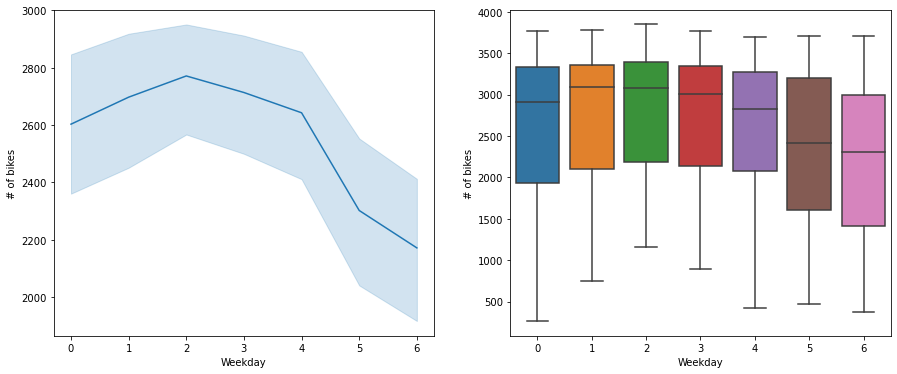

In [14]:
fig, ax = plt.subplots(1,2, figsize=(15,6))

sns.lineplot(x=bike_daily_demand.index.get_level_values(1), y=bike_daily_demand['bike_id'],ax=ax[0])

sns.boxplot(x=bike_daily_demand.index.get_level_values(1), y=bike_daily_demand['bike_id'],ax=ax[1])

ax[0].set(xlabel='Weekday', ylabel='# of bikes')
ax[1].set(xlabel='Weekday', ylabel='# of bikes')
plt.show()

- patterns
- explanation

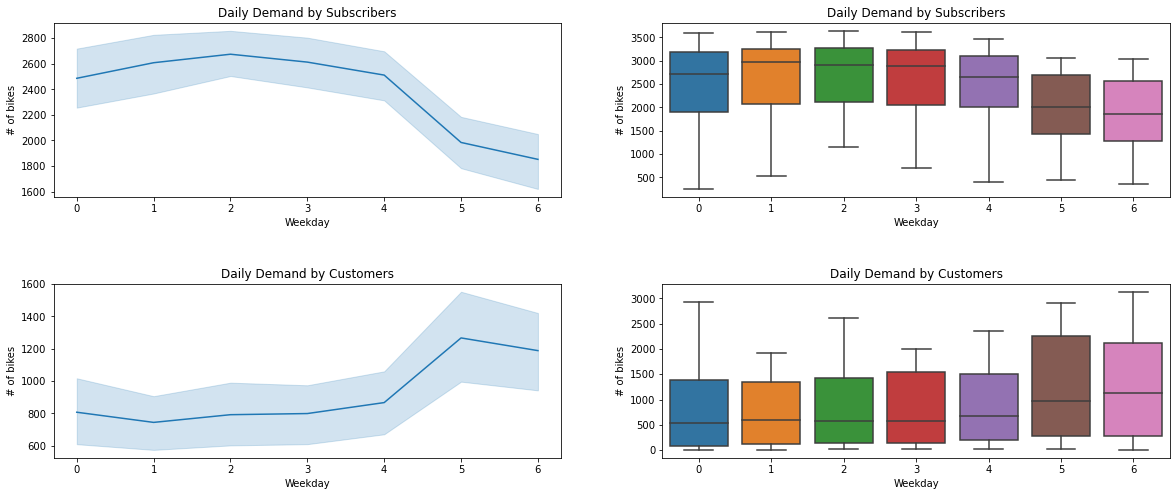

In [23]:
# daily demand by usertype
bike_daily_demand_subscriber = bike_df[bike_df['user_type'] == 'Subscriber'].groupby(['date', 'weekday'])['bike_id'].nunique()
bike_daily_demand_subscriber = pd.DataFrame(bike_daily_demand_subscriber)

bike_daily_demand_customer = bike_df[bike_df['user_type'] == 'Customer'].groupby(['date', 'weekday'])['bike_id'].nunique()
bike_daily_demand_customer = pd.DataFrame(bike_daily_demand_customer)


fig, ax = plt.subplots(2,2, figsize=(20,8))

sns.lineplot(x=bike_daily_demand_subscriber.index.get_level_values(1), y=bike_daily_demand_subscriber['bike_id'],ax=ax[0,0])

sns.boxplot(x=bike_daily_demand_subscriber.index.get_level_values(1), y=bike_daily_demand_subscriber['bike_id'],ax=ax[0,1])

sns.lineplot(x=bike_daily_demand_customer.index.get_level_values(1), y=bike_daily_demand_customer['bike_id'],ax=ax[1,0])

sns.boxplot(x=bike_daily_demand_customer.index.get_level_values(1), y=bike_daily_demand_customer['bike_id'],ax=ax[1,1])

ax[0,0].set(xlabel='Weekday', ylabel='# of bikes')
ax[0,1].set(xlabel='Weekday', ylabel='# of bikes')
ax[1,0].set(xlabel='Weekday', ylabel='# of bikes')
ax[1,1].set(xlabel='Weekday', ylabel='# of bikes')

fig.subplots_adjust(hspace=.5)

ax[0,0].set_title('Daily Demand by Subscribers')
ax[0,1].set_title('Daily Demand by Subscribers')
ax[1,0].set_title('Daily Demand by Customers')
ax[1,1].set_title('Daily Demand by Customers')

plt.show()

In [15]:
# monthly demand
bike_monthly_demand = bike_df.groupby(['date', 'month'])['bike_id'].nunique()
bike_monthly_demand = pd.DataFrame(bike_monthly_demand)

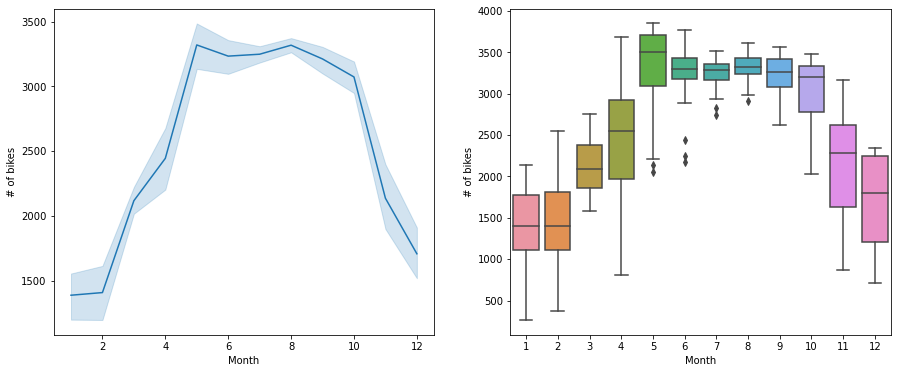

In [16]:
fig, ax = plt.subplots(1,2, figsize=(15,6))

sns.lineplot(x=bike_monthly_demand.index.get_level_values(1), y=bike_monthly_demand['bike_id'],ax=ax[0])

sns.boxplot(x=bike_monthly_demand.index.get_level_values(1), y=bike_monthly_demand['bike_id'],ax=ax[1])

ax[0].set(xlabel='Month', ylabel='# of bikes')
ax[1].set(xlabel='Month', ylabel='# of bikes')
plt.show()

- patterns
- explanations

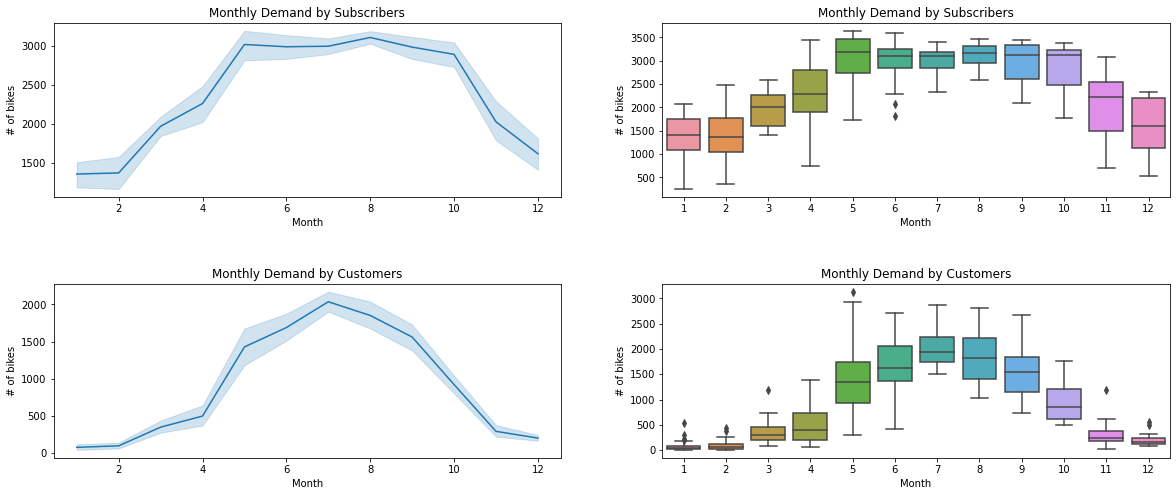

In [24]:
# monthly demand by usertype
bike_monthly_demand_subscriber = bike_df[bike_df['user_type'] == 'Subscriber'].groupby(['date', 'month'])['bike_id'].nunique()
bike_monthly_demand_subscriber = pd.DataFrame(bike_monthly_demand_subscriber)

bike_monthy_demand_customer = bike_df[bike_df['user_type'] == 'Customer'].groupby(['date', 'month'])['bike_id'].nunique()
bike_monthy_demand_customer = pd.DataFrame(bike_monthy_demand_customer)


fig, ax = plt.subplots(2,2, figsize=(20,8))

sns.lineplot(x=bike_monthly_demand_subscriber.index.get_level_values(1), y=bike_monthly_demand_subscriber['bike_id'],ax=ax[0,0])

sns.boxplot(x=bike_monthly_demand_subscriber.index.get_level_values(1), y=bike_monthly_demand_subscriber['bike_id'],ax=ax[0,1])

sns.lineplot(x=bike_monthy_demand_customer.index.get_level_values(1), y=bike_monthy_demand_customer['bike_id'],ax=ax[1,0])

sns.boxplot(x=bike_monthy_demand_customer.index.get_level_values(1), y=bike_monthy_demand_customer['bike_id'],ax=ax[1,1])

ax[0,0].set(xlabel='Month', ylabel='# of bikes')
ax[0,1].set(xlabel='Month', ylabel='# of bikes')
ax[1,0].set(xlabel='Month', ylabel='# of bikes')
ax[1,1].set(xlabel='Month', ylabel='# of bikes')

fig.subplots_adjust(hspace=.5)

ax[0,0].set_title('Monthly Demand by Subscribers')
ax[0,1].set_title('Monthly Demand by Subscribers')
ax[1,0].set_title('Monthly Demand by Customers')
ax[1,1].set_title('Monthly Demand by Customers')

plt.show()

In [17]:
# take aways:
# demand during the day is highest between 6-9 and 15-19
# demand during the week is higher on working days than on the weekend
# demand during the year is higher in summer than in winter

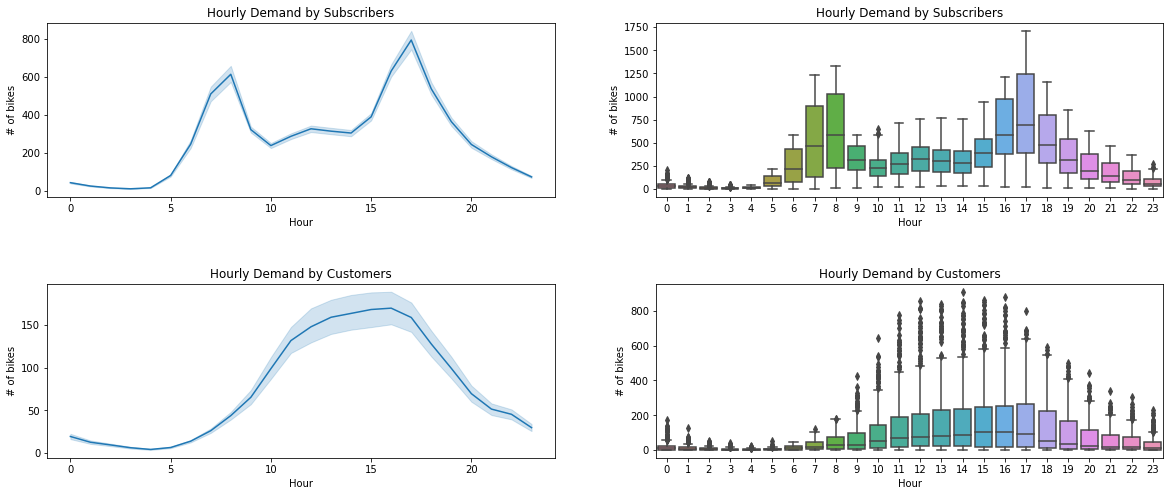

In [18]:
# hourly demand by usertype
bike_hourly_demand_subscriber = bike_df[bike_df['user_type'] == 'Subscriber'].groupby(['date', 'hour'])['bike_id'].nunique()
bike_hourly_demand_subscriber = pd.DataFrame(bike_hourly_demand_subscriber)

bike_hourly_demand_customer = bike_df[bike_df['user_type'] == 'Customer'].groupby(['date', 'hour'])['bike_id'].nunique()
bike_hourly_demand_customer = pd.DataFrame(bike_hourly_demand_customer)


fig, ax = plt.subplots(2,2, figsize=(20,8))

sns.lineplot(x=bike_hourly_demand_subscriber.index.get_level_values(1), y=bike_hourly_demand_subscriber['bike_id'],ax=ax[0,0])

sns.boxplot(x=bike_hourly_demand_subscriber.index.get_level_values(1), y=bike_hourly_demand_subscriber['bike_id'],ax=ax[0,1])

sns.lineplot(x=bike_hourly_demand_customer.index.get_level_values(1), y=bike_hourly_demand_customer['bike_id'],ax=ax[1,0])

sns.boxplot(x=bike_hourly_demand_customer.index.get_level_values(1), y=bike_hourly_demand_customer['bike_id'],ax=ax[1,1])

ax[0,0].set(xlabel='Hour', ylabel='# of bikes')
ax[0,1].set(xlabel='Hour', ylabel='# of bikes')
ax[1,0].set(xlabel='Hour', ylabel='# of bikes')
ax[1,1].set(xlabel='Hour', ylabel='# of bikes')

fig.subplots_adjust(hspace=.5)

ax[0,0].set_title('Hourly Demand by Subscribers')
ax[0,1].set_title('Hourly Demand by Subscribers')
ax[1,0].set_title('Hourly Demand by Customers')
ax[1,1].set_title('Hourly Demand by Customers')

plt.show()

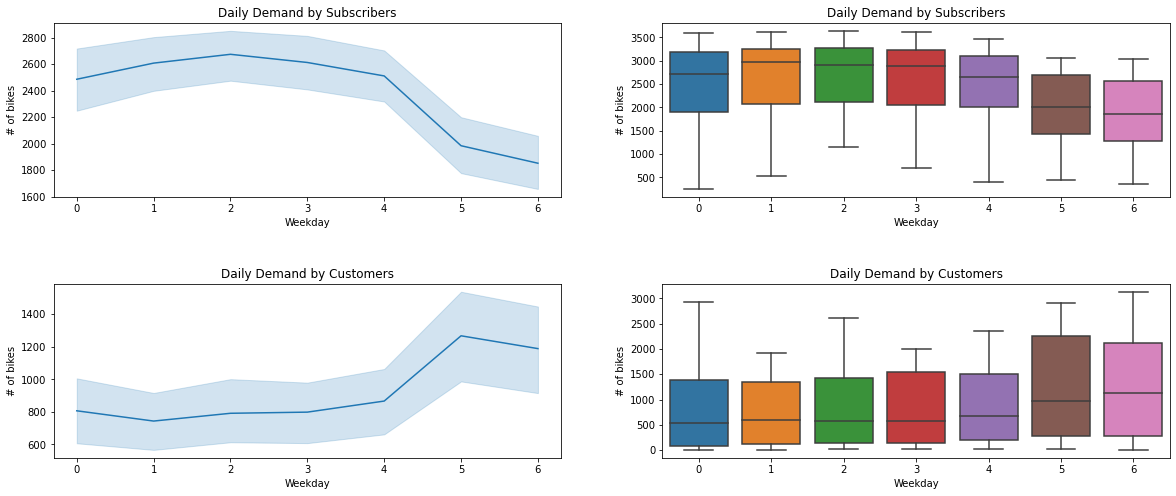

In [19]:
# daily demand by usertype
bike_daily_demand_subscriber = bike_df[bike_df['user_type'] == 'Subscriber'].groupby(['date', 'weekday'])['bike_id'].nunique()
bike_daily_demand_subscriber = pd.DataFrame(bike_daily_demand_subscriber)

bike_daily_demand_customer = bike_df[bike_df['user_type'] == 'Customer'].groupby(['date', 'weekday'])['bike_id'].nunique()
bike_daily_demand_customer = pd.DataFrame(bike_daily_demand_customer)


fig, ax = plt.subplots(2,2, figsize=(20,8))

sns.lineplot(x=bike_daily_demand_subscriber.index.get_level_values(1), y=bike_daily_demand_subscriber['bike_id'],ax=ax[0,0])

sns.boxplot(x=bike_daily_demand_subscriber.index.get_level_values(1), y=bike_daily_demand_subscriber['bike_id'],ax=ax[0,1])

sns.lineplot(x=bike_daily_demand_customer.index.get_level_values(1), y=bike_daily_demand_customer['bike_id'],ax=ax[1,0])

sns.boxplot(x=bike_daily_demand_customer.index.get_level_values(1), y=bike_daily_demand_customer['bike_id'],ax=ax[1,1])

ax[0,0].set(xlabel='Weekday', ylabel='# of bikes')
ax[0,1].set(xlabel='Weekday', ylabel='# of bikes')
ax[1,0].set(xlabel='Weekday', ylabel='# of bikes')
ax[1,1].set(xlabel='Weekday', ylabel='# of bikes')

fig.subplots_adjust(hspace=.5)

ax[0,0].set_title('Daily Demand by Subscribers')
ax[0,1].set_title('Daily Demand by Subscribers')
ax[1,0].set_title('Daily Demand by Customers')
ax[1,1].set_title('Daily Demand by Customers')

plt.show()

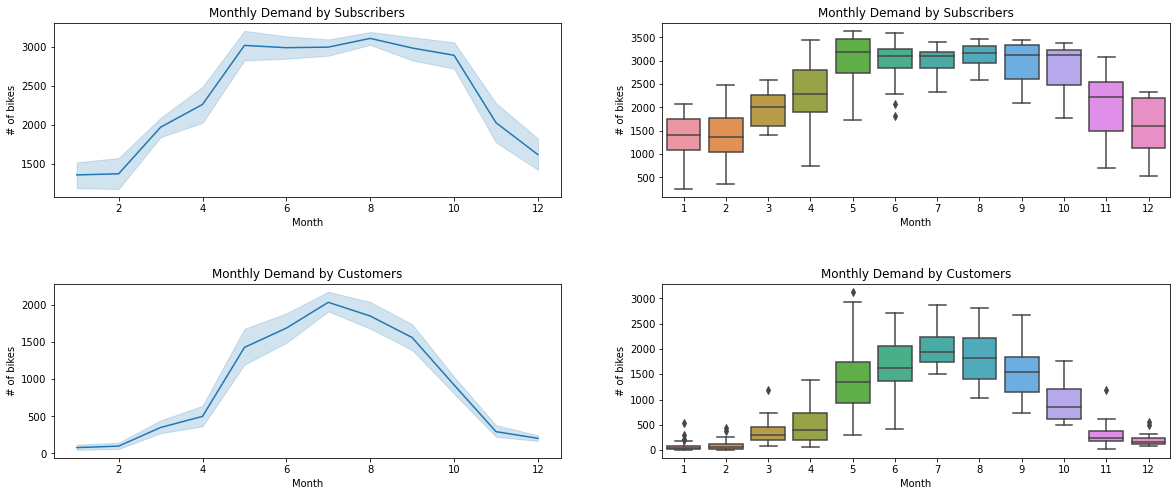

In [20]:
# monthly demand by usertype
bike_monthly_demand_subscriber = bike_df[bike_df['user_type'] == 'Subscriber'].groupby(['date', 'month'])['bike_id'].nunique()
bike_monthly_demand_subscriber = pd.DataFrame(bike_monthly_demand_subscriber)

bike_monthy_demand_customer = bike_df[bike_df['user_type'] == 'Customer'].groupby(['date', 'month'])['bike_id'].nunique()
bike_monthy_demand_customer = pd.DataFrame(bike_monthy_demand_customer)


fig, ax = plt.subplots(2,2, figsize=(20,8))

sns.lineplot(x=bike_monthly_demand_subscriber.index.get_level_values(1), y=bike_monthly_demand_subscriber['bike_id'],ax=ax[0,0])

sns.boxplot(x=bike_monthly_demand_subscriber.index.get_level_values(1), y=bike_monthly_demand_subscriber['bike_id'],ax=ax[0,1])

sns.lineplot(x=bike_monthy_demand_customer.index.get_level_values(1), y=bike_monthy_demand_customer['bike_id'],ax=ax[1,0])

sns.boxplot(x=bike_monthy_demand_customer.index.get_level_values(1), y=bike_monthy_demand_customer['bike_id'],ax=ax[1,1])

ax[0,0].set(xlabel='Month', ylabel='# of bikes')
ax[0,1].set(xlabel='Month', ylabel='# of bikes')
ax[1,0].set(xlabel='Month', ylabel='# of bikes')
ax[1,1].set(xlabel='Month', ylabel='# of bikes')

fig.subplots_adjust(hspace=.5)

ax[0,0].set_title('Monthly Demand by Subscribers')
ax[0,1].set_title('Monthly Demand by Subscribers')
ax[1,0].set_title('Monthly Demand by Customers')
ax[1,1].set_title('Monthly Demand by Customers')

plt.show()

In [21]:
# take aways:
# subscriber seem to use bikes to get to and from work
# customers use bikes for 'joyrides' / are tourists